In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [203]:
df = pd.read_csv('data/maternalhealthrisk.csv')

In [204]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


### Converting column names to lowercase

In [205]:
df.columns = df.columns.str.lower()

In [206]:
df

,age,systolicbp,diastolicbp,bs,bodytemp,heartrate,risklevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


### No missing value in the dataset

In [207]:
df.isnull().sum()

age            0
systolicbp     0
diastolicbp    0
bs             0
bodytemp       0
heartrate      0
risklevel      0
dtype: int64

### Separating dataset into 'X' and 'y'

In [208]:
X = df.drop('risklevel', axis='columns')
y = df.risklevel

##  Implementation of Descistion tree model

In [209]:
# Decision Tree classifer object
model = DecisionTreeClassifier()

# Split into 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1) 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(709, 6)
(709,)
(305, 6)
(305,)


### Fitting training data into model

In [210]:
# Train Decision Tree Classifer
model.fit(X_train,y_train)
print(model.get_depth())

16


In [211]:
# Capturing the response for test dataset
y_hat = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_hat))

Test Accuracy: 0.8065573770491803


In [212]:
# Training Accuracy
print("Training Accuracy:", model.score(X_train, y_train))

Training Accuracy: 0.9294781382228491


### Note: Above trainig and test accuracy results pointing towards 'overfitting' of the model

### confusion matrix with individual class accuracy value

In [213]:
cm = confusion_matrix(y_test, y_hat)
 
print("CM", cm)
print()
 
class_accuracy = cm.diagonal() / cm.sum(axis=1)
print(class_accuracy)

CM [[79  5  3]
 [ 4 95 18]
 [12 17 72]]

[0.90804598 0.81196581 0.71287129]


# Cross validation section

### Performing cross validation to find out suitable 'max_depth' value

In [214]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=5)
print(scores.mean())

0.8138247927279991


In [215]:
for d in range(2,20) :
    tree = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(tree, X_train, y_train, cv=5)
    print(d, scores, "Mean scores ", scores.mean())

2 [0.62676056 0.61971831 0.61267606 0.62676056 0.60992908] Mean scores  0.6191689141943861
3 [0.66901408 0.63380282 0.63380282 0.69014085 0.67375887] Mean scores  0.6601038857257018
4 [0.70422535 0.67605634 0.66901408 0.73239437 0.69503546] Mean scores  0.6953451203675955
5 [0.73239437 0.67605634 0.68309859 0.71126761 0.73049645] Mean scores  0.7066626710618321
6 [0.71830986 0.73239437 0.67605634 0.75352113 0.70212766] Mean scores  0.7164818699430627
7 [0.74647887 0.78169014 0.71830986 0.75352113 0.73049645] Mean scores  0.7460992907801419
8 [0.75352113 0.76760563 0.71126761 0.77464789 0.75886525] Mean scores  0.7531815003496154
9 [0.79577465 0.73943662 0.71830986 0.81690141 0.77304965] Mean scores  0.7686944361202678
10 [0.77464789 0.75352113 0.73239437 0.79577465 0.73758865] Mean scores  0.7587853361302568
11 [0.79577465 0.73943662 0.74647887 0.80985915 0.79432624] Mean scores  0.77717510738188
12 [0.80985915 0.78169014 0.76760563 0.83802817 0.81560284] Mean scores  0.802557187094196

# Train and Test again after cross-validation

In [216]:
# Split into 70% training and 30% test
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=1) 

# Create Decision Tree classifer object with 'depth-level=9'

model = DecisionTreeClassifier(max_depth=8)

# Train Decision Tree Classifer
model.fit(X1_train,y1_train)

# Training and Test accuracy values

print("Training Accuracy:", model.score(X1_train, y1_train))
print("Test Accuracy:", model.score(X1_test, y1_test))


Training Accuracy: 0.8110014104372355
Test Accuracy: 0.7344262295081967


## Difference between training and test accuracy results has been reduced by using lower 'max_depth' value

In [217]:
feature_s = (df.columns).to_list()
feature_names = feature_s[:-1]
feature_names

['age', 'systolicbp', 'diastolicbp', 'bs', 'bodytemp', 'heartrate']

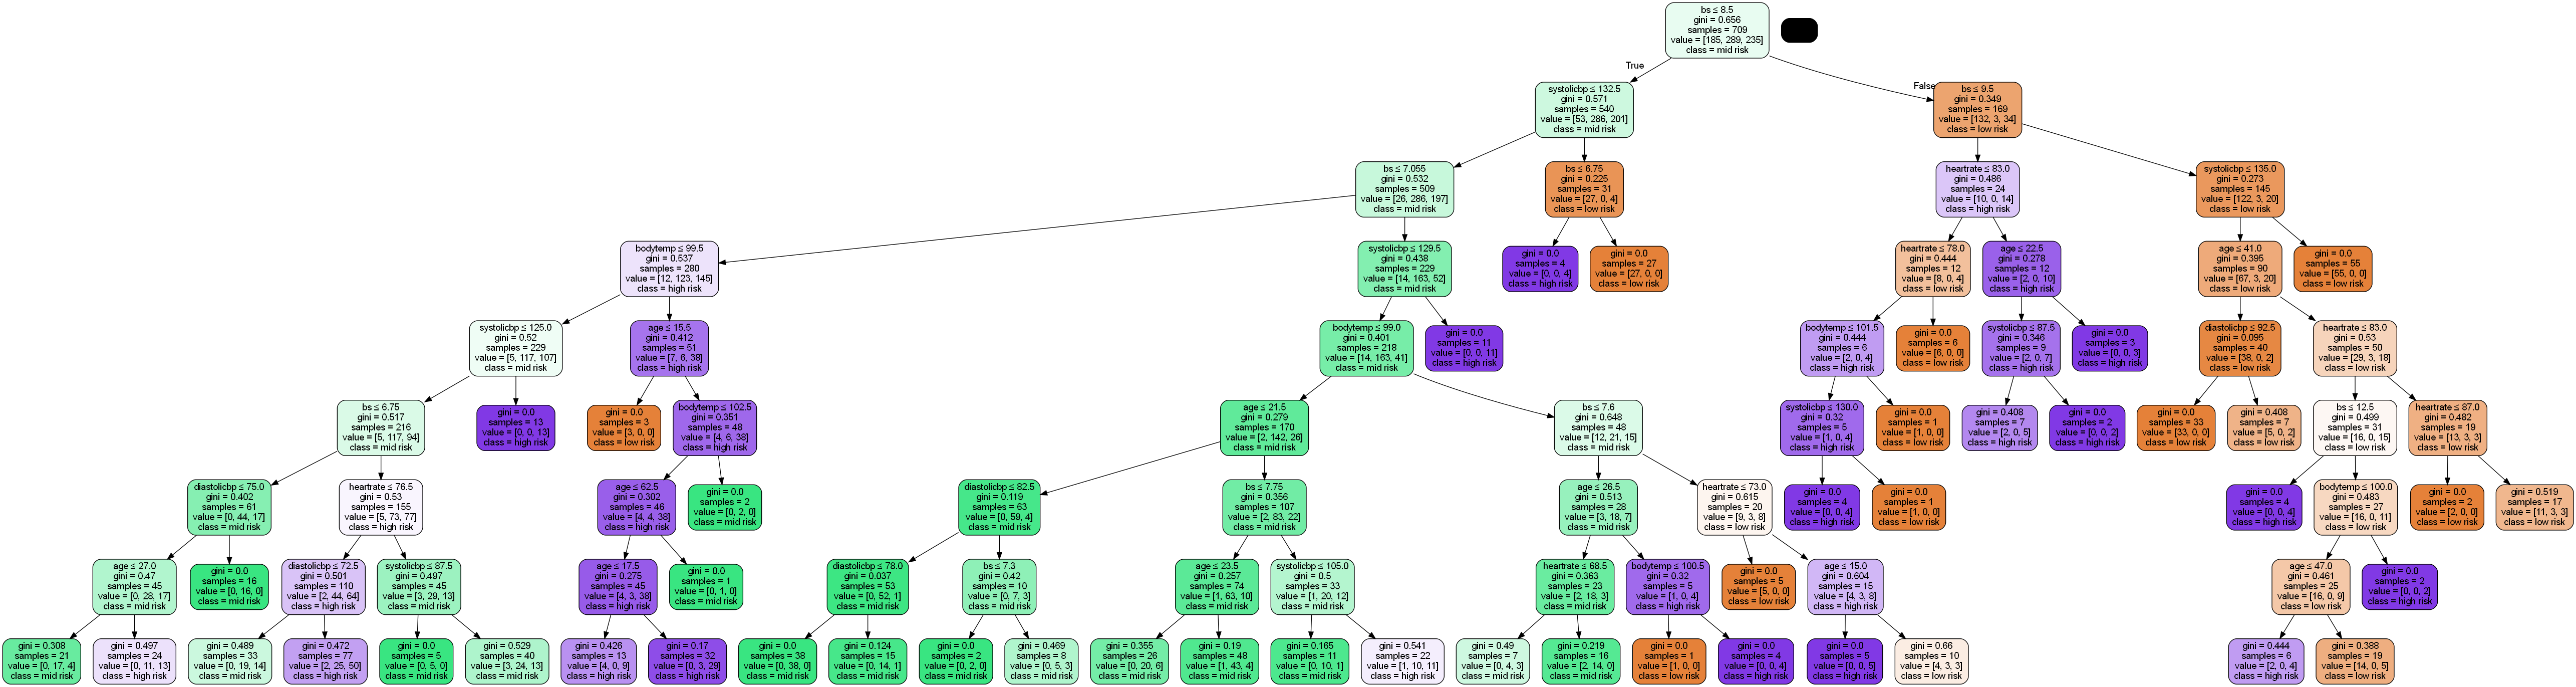

In [218]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_names, class_names=['low risk','mid risk','high risk'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('plots/decision_tree.png')
Image(graph.create_png())